In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import time
import torch.nn.functional as F 
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [ ]:
# load brain_extraction data
X_Guys = np.load('/content/drive/MyDrive/dhl_exam/data/brain_extraction/X_Guys.npy')
y_Guys = np.load('/content/drive/MyDrive/dhl_exam/data/brain_extraction/y_Guys.npy')
ids_Guys = np.load('/content/drive/MyDrive/dhl_exam/data/brain_extraction/ids_Guys.npy')
X_HH = np.load('/content/drive/MyDrive/dhl_exam/data/brain_extraction/X_HH.npy')
y_HH = np.load('/content/drive/MyDrive/dhl_exam/data/brain_extraction/y_HH.npy')
ids_HH = np.load('/content/drive/MyDrive/dhl_exam/data/brain_extraction/ids_HH.npy')
X_IOP = np.load('/content/drive/MyDrive/dhl_exam/data/brain_extraction/X_IOP.npy')
y_IOP = np.load('/content/drive/MyDrive/dhl_exam/data/brain_extraction/y_IOP.npy')
ids_IOP = np.load('/content/drive/MyDrive/dhl_exam/data/brain_extraction/ids_IOP.npy')

Inspecting Guys data
(317, 40, 128, 128)
(317, 40, 128, 128)
(317,)
Inspecting HH data
(176, 40, 128, 128)
(176, 40, 128, 128)
(176,)
Inspecting IOP data
(71, 40, 128, 128)
(71, 40, 128, 128)
(71,)


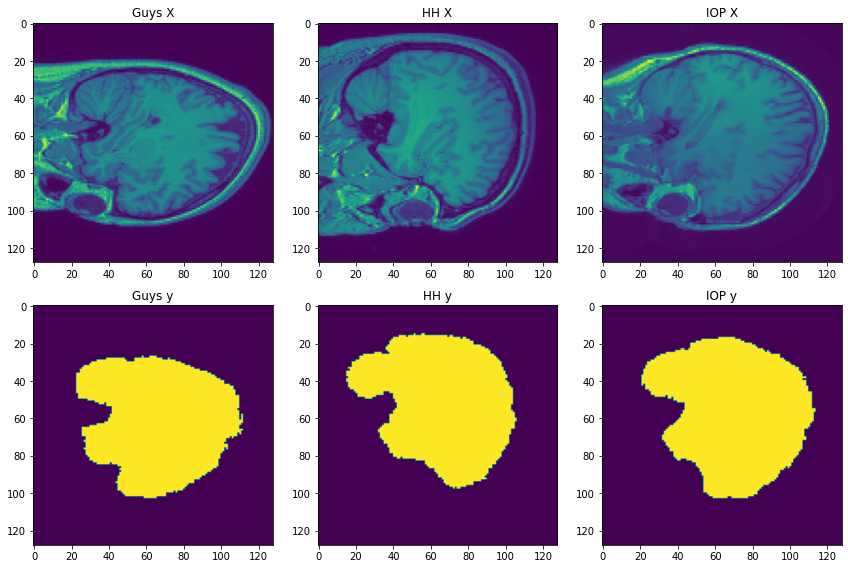

In [ ]:
print("Inspecting Guys data")
print(X_Guys.shape)
print(y_Guys.shape)
print(ids_Guys.shape)
print("Inspecting HH data")
print(X_HH.shape)
print(y_HH.shape)
print(ids_HH.shape)
print("Inspecting IOP data")
print(X_IOP.shape)
print(y_IOP.shape)
print(ids_IOP.shape)


fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].imshow(X_Guys[50][0])
axes[0, 0].set_title("Guys X")

axes[0, 1].imshow(X_HH[50][0])
axes[0, 1].set_title("HH X")

axes[0, 2].imshow(X_IOP[50][0])
axes[0, 2].set_title("IOP X")

axes[1, 0].imshow(y_Guys[50][0])
axes[1, 0].set_title("Guys y")

axes[1, 1].imshow(y_HH[50][0])
axes[1, 1].set_title("HH y")

axes[1, 2].imshow(y_IOP[50][0])
axes[1, 2].set_title("IOP y")

plt.tight_layout()
plt.show()


In [ ]:
#center data
def centring(X):
    X=np.asarray(X)
    epsilon = 1e-7 
    mean = np.mean(X, axis=0, keepdims=True)
    std = np.std(X, axis=0, keepdims=True)
    centered_array = (X - mean) / (std+epsilon)
    return centered_array

X_Guys_centered=centring(X_Guys)
X_HH_centered=centring(X_HH)
X_IOP_centered=centring(X_IOP)

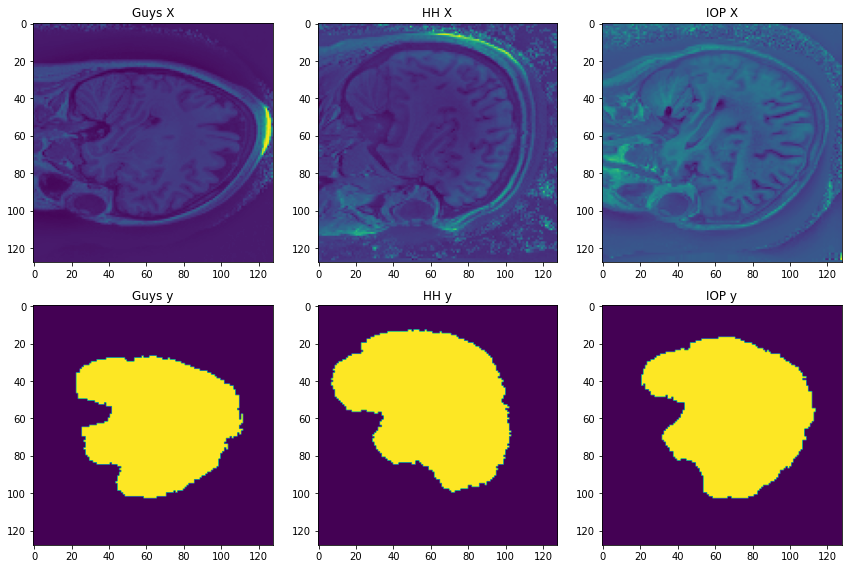

In [ ]:
# plot after centering
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].imshow(X_Guys_centered[50][0])
axes[0, 0].set_title("Guys X")

axes[0, 1].imshow(X_HH_centered[50][0])
axes[0, 1].set_title("HH X")

axes[0, 2].imshow(X_IOP_centered[50][0])
axes[0, 2].set_title("IOP X")

axes[1, 0].imshow(y_Guys[50][0])
axes[1, 0].set_title("Guys y")

axes[1, 1].imshow(y_HH[0][0])
axes[1, 1].set_title("HH y")

axes[1, 2].imshow(y_IOP[50][0])
axes[1, 2].set_title("IOP y")

plt.tight_layout()
plt.show()

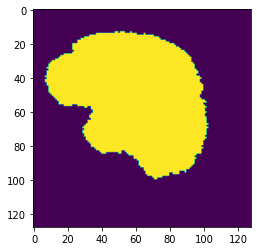

(128, 128)


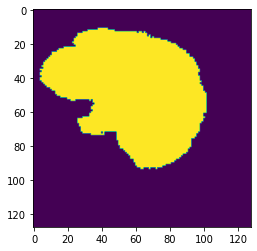

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
def to_one_hot_binary_matrix_batch(batch_matrix):
    batch_matrix = np.array(batch_matrix, dtype='int')
    one_hot = np.zeros((batch_matrix.shape[0], 2, batch_matrix.shape[1], batch_matrix.shape[2]), dtype=float)
    one_hot[:, 0] = batch_matrix == 1
    one_hot[:, 1] = batch_matrix == 0
    
    return one_hot

plt.imshow(y_HH[0][0])
plt.show()
print(y_HH[0][0].shape)
encoded = to_one_hot_binary_matrix_batch((y_HH[0]))
plt.imshow(y_train[0][0])
plt.show()

plt.show()
print(y_HH[0][0])

In [ ]:
# producing required train / val / test split
print("initial shapes")
print(X_Guys.shape)
print(y_Guys.shape)
print(ids_Guys.shape)
print(X_HH.shape)
print(y_HH.shape)
print(ids_HH.shape)
print(X_IOP.shape)
print(y_IOP.shape)
print(ids_IOP.shape)

combined_Guys_HH_X = np.concatenate([X_Guys_centered, X_HH_centered], axis=0)
combined_Guys_HH_y = np.concatenate([y_Guys, y_HH], axis=0)

X_train = torch.Tensor(combined_Guys_HH_X[0:int(len(combined_Guys_HH_X)*0.85)])
y_train = torch.Tensor(combined_Guys_HH_y[0:int(len(combined_Guys_HH_y)*0.85)])

# val data 15%
X_val = torch.Tensor(combined_Guys_HH_X[int(len(combined_Guys_HH_X)*0.85):int(len(combined_Guys_HH_X))])
y_val = torch.Tensor(combined_Guys_HH_y[int(len(combined_Guys_HH_y)*0.85):int(len(combined_Guys_HH_y))])

#test data from IOP
X_test =  torch.Tensor(X_IOP_centered[0:int(len(X_IOP_centered))])
y_test = torch.Tensor(y_IOP[0:int(len(y_IOP))])

print("Check after split")
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

initial shapes
(317, 40, 128, 128)
(317, 40, 128, 128)
(317,)
(176, 40, 128, 128)
(176, 40, 128, 128)
(176,)
(71, 40, 128, 128)
(71, 40, 128, 128)
(71,)
Check after split
torch.Size([419, 40, 128, 128])
torch.Size([419, 40, 128, 128])
torch.Size([74, 40, 128, 128])
torch.Size([74, 40, 128, 128])
torch.Size([71, 40, 128, 128])
torch.Size([71, 40, 128, 128])


In [ ]:
# slice data into 2D
def reslice(x, split_size):
  temp = torch.split(x,split_size,dim=1)
  output=[]
  for i in range(len(temp)):
    output.append(temp[i])
  output=torch.cat(output, dim=0)
  return output

#X_train=reslice(X_train,1)
#y_train=reslice(y_train,1)
#X_val=reslice(X_val,1)
#y_val=reslice(y_val,1)
#X_test=reslice(X_test,1)
#y_test=reslice(y_test,1)

#sample slices - just pick 1 slice from 40 so for training always 
X_train=X_train[:,10,:,:]
X_val=X_val[:,20,:,:]
X_test=X_test[:,30,:,:]
y_train=y_train[:,10,:,:]
y_val=y_val[:,20,:,:]
y_test=y_test[:,30,:,:]

#introduce channel
X_train=torch.reshape(X_train,(len(X_train),1,128,128))
X_val=torch.reshape(X_val,(len(X_val),1,128,128))
X_test=torch.reshape(X_test,(len(X_test),1,128,128))


print("Check shapes after slicing into 2D")
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)


Check shapes after slicing into 2D
torch.Size([419, 1, 128, 128])
torch.Size([419, 128, 128])
torch.Size([74, 1, 128, 128])
torch.Size([74, 128, 128])
torch.Size([71, 1, 128, 128])
torch.Size([71, 128, 128])


(419, 2, 128, 128)
(74, 2, 128, 128)
(71, 2, 128, 128)


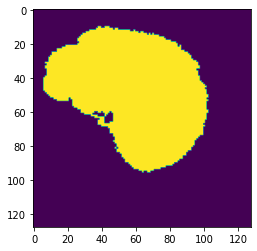

In [ ]:
y_train = to_one_hot_binary_matrix_batch(y_train)
y_val= to_one_hot_binary_matrix_batch(y_val)
y_test = to_one_hot_binary_matrix_batch(y_test)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
plt.imshow(y_test[0][0])

In [ ]:
X_train=np.asarray(X_train)
X_val=np.asarray(X_val)
X_test=np.asarray(X_test)

class numpy_dataset(Dataset): 
    def __init__(self, data, target): 
        self.data =  torch.from_numpy(data)
        self.target = torch.from_numpy(target)

    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        return x, y

    def __len__(self):
        return len(self.data)
    
train_dataset = numpy_dataset(X_train, y_train)
val_dataset = numpy_dataset(X_val, y_val)
test_dataset = numpy_dataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, drop_last=True)


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class SegNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(SegNet, self).__init__()

        self.in_channels = in_channels
        self.num_classes = num_classes


        self.conv1 = nn.Conv2d(in_channels, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.conv5 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(512)

        self.conv6 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(512)
        self.conv7 = nn.Conv2d(512, 256, kernel_size=3, padding=1)
        self.bn7 = nn.BatchNorm2d(256)
        self.conv8 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.bn8 = nn.BatchNorm2d(128)
        self.conv9 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.bn9 = nn.BatchNorm2d(64)
        self.conv10 = nn.Conv2d(64, num_classes, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)
        self.unpool = nn.MaxUnpool2d(kernel_size=2, stride=2)

    def forward(self, x):

        x = F.relu(self.bn1(self.conv1(x)))
        x, pool1_indices = self.pool(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x, pool2_indices = self.pool(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x, pool3_indices = self.pool(x)
        x = F.relu(self.bn4(self.conv4(x)))
        x, pool4_indices = self.pool(x)
        x = F.relu(self.bn5(self.conv5(x)))
        x, pool5_indices = self.pool(x)
        x = self.unpool(x, pool5_indices)
        x = F.relu(self.bn6(self.conv6(x)))
        x = self.unpool(x, pool4_indices)
        x = F.relu(self.bn7(self.conv7(x)))
        x = self.unpool(x, pool3_indices)
        x = F.relu(self.bn8(self.conv8(x)))
        x = self.unpool(x, pool2_indices)
        x = F.relu(self.bn9(self.conv9(x)))
        x = self.conv10(x)
        x = F.interpolate(x, size=(128, 128), mode='bilinear', align_corners=False)
        return torch.sigmoid(x)


class FCN_flexible(nn.Module):
    def __init__(self, input_shape=(1, 128, 128), num_classes=2, dropout_prob=0.5, num_layers=5):
        super(FCN_flexible, self).__init__()
        encoder_layers = []
        in_channels = input_shape[0]
        for i in range(num_layers):
            out_channels = 64 * (2 ** i)
            encoder_layers.extend([
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_prob),
                nn.MaxPool2d(kernel_size=2, stride=2)
            ])
            in_channels = out_channels

        self.encoder = nn.Sequential(*encoder_layers)
        self.middle = nn.Sequential(
            nn.Conv2d(in_channels, in_channels * 2, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_prob),
            nn.Conv2d(in_channels * 2, in_channels, kernel_size=1)
        )
        decoder_layers = []
        for i in range(num_layers - 1, -1, -1):
            out_channels = 64 * (2 ** i)
            decoder_layers.extend([
                nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_prob)
            ])
            in_channels = out_channels

        decoder_layers.extend([
            nn.Conv2d(out_channels, num_classes, kernel_size=1),
            nn.Sigmoid()
        ])

        self.decoder = nn.Sequential(*decoder_layers)

    def forward(self, x):
        x = self.encoder(x)
        x = self.middle(x)
        x = self.decoder(x)
        return x


def conv_block(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True)
    )

class Encoder(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Encoder, self).__init__()
        self.pool = nn.MaxPool2d(2)
        self.conv = conv_block(in_channels, out_channels)

    def forward(self, x):
        return self.conv(self.pool(x))

class Decoder(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Decoder, self).__init__()
        self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
        self.conv = conv_block(in_channels, out_channels)

    def forward(self, x, skip):
        x = self.up(x)
        x = torch.cat((skip, x), dim=1)
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        self.init_conv = conv_block(in_channels, 64)
        self.encoders = nn.ModuleList([
            Encoder(64, 128),
            Encoder(128, 256),
            Encoder(256, 512),
            Encoder(512, 1024)
        ])
        self.decoders = nn.ModuleList([
            Decoder(1024, 512),
            Decoder(512, 256),
            Decoder(256, 128),
            Decoder(128, 64)
        ])
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        x1 = self.init_conv(x)
        skips = [x1]
        for encoder in self.encoders:
            skips.append(encoder(skips[-1]))

        x = skips.pop()
        for decoder in self.decoders:
            x = decoder(x, skips.pop())

        return self.final_conv(x)


In [ ]:
# dice and base training loop adapted from Kaggle
def dice_coef_metric(pred, label):
    intersection = 2.0 * (pred * label).sum()
    union = pred.sum() + label.sum()
    if pred.sum() == 0 and label.sum() == 0:
        return 1.
    return intersection / union

def dice_coef_loss(pred, label):
    smooth = 1.0
    intersection = 2.0 * (pred * label).sum() + smooth
    union = pred.sum() + label.sum() + smooth
    return 1 - (intersection / union)

def bce_dice_loss(pred, label):
    dice_loss = dice_coef_loss(pred, label)
    bce_loss = nn.BCELoss()(pred, label)
    return dice_loss + bce_loss

class TverskyLoss(nn.Module):
    def __init__(self, alpha=0.5, beta=0.5, smooth=1.0):
        super(TverskyLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.smooth = smooth

    def forward(self, input, target):
        if not (target.size() == input.size()):
            raise ValueError("Target size ({}) must be the same as input size ({})"
                             .format(target.size(), input.size()))

        input = F.sigmoid(input)

        tp = (input * target).sum()
        fp = ((1 - target) * input).sum()
        fn = (target * (1 - input)).sum()

        tversky = (tp + self.smooth) / (tp + self.alpha * fp + self.beta * fn + self.smooth)
        loss = 1 - tversky

        return loss

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=0.25):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, input, target):
        if not (target.size() == input.size()):
            raise ValueError("Target size ({}) must be the same as input size ({})"
                             .format(target.size(), input.size()))

        max_val = (-input).clamp(min=0)
        loss = input - input * target + max_val + ((-max_val).exp() + (-input - max_val).exp()).log()

        invprobs = F.logsigmoid(-input * (target * 2.0 - 1.0))
        loss = (invprobs * self.alpha).exp() * loss

        return loss.mean()

def lovasz_softmax_flat(logits, labels):
 
    probas = F.softmax(logits, dim=1)
    labels = labels.float()
    if probas.numel() == 0:
        return logits * 0.0

    signs = 2 * labels - 1
    errors = (1 - probas * signs)
    errors_sorted, perm = torch.sort(errors.reshape(-1), dim=0, descending=True)
    perm = perm.cpu().numpy()
    gt_sorted = labels.reshape(-1)[perm]
    grad = lovasz_grad(gt_sorted)

    loss = torch.dot(F.elu(errors_sorted) + 1, Variable(grad, requires_grad=False))
    return loss

def lovasz_grad(gt_sorted):
    p = len(gt_sorted)
    gts = gt_sorted.sum()
    intersection = gts - gt_sorted.cumsum(0)
    union = gts + (1 - gt_sorted).cumsum(0)
    jaccard = 1.0 - intersection / union
    if p > 1:  
        jaccard[1:p] = jaccard[1:p] - jaccard[0:-1]
    return jaccard

In [ ]:
def train_loop(model, loader, loss_func,optimizer):
    model.train()
    train_losses = []
    train_dices = []
    for i, (image, mask) in enumerate(loader):
        image = image.to(device).float()
        mask = mask.to(device).float()
        outputs = model(image)
        out_cut = np.copy(outputs.data.cpu().numpy())
        out_cut[np.nonzero(out_cut < 0.5)] = 0.0
        out_cut[np.nonzero(out_cut >= 0.5)] = 1.0            

        dice = dice_coef_metric(out_cut, mask.data.cpu().numpy())
        loss = loss_func(outputs, mask)
        train_losses.append(loss.item())
        train_dices.append(dice)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    return train_dices, train_losses

def eval_loop(model, loader, loss_func, scheduler,training=True):
    model.eval()
    val_loss = 0
    val_dice = 0
    with torch.no_grad():
        for step, (image, mask) in enumerate(loader):
            image = image.to(device).float()
            mask = mask.to(device).float()
    
            outputs = model(image)
            loss = loss_func(outputs, mask)
            
            out_cut = np.copy(outputs.data.cpu().numpy())
            out_cut[np.nonzero(out_cut < 0.5)] = 0.0
            out_cut[np.nonzero(out_cut >= 0.5)] = 1.0
            dice = dice_coef_metric(out_cut, mask.data.cpu().numpy())
            
            val_loss += loss
            val_dice += dice
        
        val_mean_dice = val_dice / len(loader)
        val_mean_loss = val_loss / step
        
        if training:
            scheduler.step(val_mean_dice)
        
    return val_mean_dice, val_mean_loss

def train_model(train_loader, val_loader, loss_func, optimizer, scheduler, num_epochs):
    train_loss_history = []
    train_dice_history = []
    val_loss_history = []
    val_dice_history = []
    
    for epoch in range(num_epochs):
        train_dices, train_losses = train_loop(model, train_loader, loss_func,optimizer)
        train_mean_dice = np.array(train_dices).mean()
        train_mean_loss = np.array(train_losses).mean()
        val_mean_dice, val_mean_loss = eval_loop(model, val_loader, loss_func,scheduler)
        
        train_loss_history.append(np.array(train_losses).mean())
        train_dice_history.append(np.array(train_dices).mean())
        val_loss_history.append(val_mean_loss.cpu().numpy())
        val_dice_history.append(val_mean_dice)
        
        print('Epoch: {}/{} |  Train Loss: {:.3f}, Val Loss: {:.3f}, Train DICE: {:.3f}, Val DICE: {:.3f}'.format(epoch+1, num_epochs,
                                                                                                                 train_mean_loss,
                                                                                                                 val_mean_loss,
                                                                                                                 train_mean_dice,
                                                                                                                 val_mean_dice))
        

    return train_loss_history, train_dice_history, val_loss_history, val_dice_history

In [ ]:
def plot_dice_history(model_name, train_dice_history, val_dice_history, num_epochs):
    
    x = np.arange(num_epochs)
    fig = plt.figure(figsize=(10, 6))
    plt.plot(x, train_dice_history, label='Training DICE Score', lw=3)
    plt.plot(x, val_dice_history, label='Validation DICE Score', lw=3)

    plt.title(f"{model_name}", fontsize=20)
    plt.legend(fontsize=12)
    plt.xlabel("Epoch", fontsize=15)
    plt.ylabel("DICE score", fontsize=15)

    path='/content/drive/MyDrive/dhl_exam/figures/'+str(model_name)+"-dice.png"
    plt.savefig(path)
    plt.show()
    

def plot_loss_history(model_name, train_loss_history, val_loss_history, num_epochs):
    
    x = np.arange(num_epochs)
    fig = plt.figure(figsize=(10, 6))
    plt.plot(x, train_loss_history, label='Training Loss', lw=3)
    plt.plot(x, val_loss_history, label='Validation Loss', lw=3)

    plt.title(f"{model_name}", fontsize=20)
    plt.legend(fontsize=12)
    plt.xlabel("Epoch", fontsize=15)
    plt.ylabel("Loss", fontsize=15)
    path='/content/drive/MyDrive/dhl_exam/figures/'+str(model_name)+"-loss.png"
    plt.savefig(path)
    plt.show()
    

def prediction_dice(net, test_dataloader):
    test_dice=0

    with torch.no_grad():  
        for batch_idx, (data, target) in enumerate(test_dataloader):
          data = data.to(device).float()
          target = target.to(device).float()
           
          pred = net(data)
          out_cut = np.copy(pred.data.cpu().numpy())
          out_cut[np.nonzero(out_cut < 0.5)] = 0.0
          out_cut[np.nonzero(out_cut >= 0.5)] = 1.0
          dice = dice_coef_metric(out_cut, target.data.cpu().numpy())
          test_dice += dice
        mean_dice = test_dice / len(test_dataloader)
        return mean_dice

def predict(net, test_dataloader):
    test_dice=0

    with torch.no_grad():  
        for batch_idx, (data, target) in enumerate(test_dataloader):
          data = data.to(device).float()
          target = target.to(device).float()
           
          pred = net(data)
    return data.data.cpu().numpy(),target.data.cpu().numpy(),pred.data.cpu().numpy()


def train_model_early_stopping(train_loader, val_loader, loss_func,optimizer, scheduler, num_epochs, patience=5):
    train_loss_history = []
    train_dice_history = []
    val_loss_history = []
    val_dice_history = []

    best_val_dice = 0
    consecutive_no_improvement = 0
    
    for epoch in range(num_epochs):
        train_dices, train_losses = train_loop(model, train_loader, loss_func, optimizer)
        train_mean_dice = np.array(train_dices).mean()
        train_mean_loss = np.array(train_losses).mean()
        val_mean_dice, val_mean_loss = eval_loop(model, val_loader, loss_func,scheduler)
        
        train_loss_history.append(train_mean_loss)
        train_dice_history.append(train_mean_dice)
        val_loss_history.append(val_mean_loss.cpu().numpy())
        val_dice_history.append(val_mean_dice)
        
        print('Epoch: {}/{} |  Train Loss: {:.3f}, Val Loss: {:.3f}, Train DICE: {:.3f}, Val DICE: {:.3f}'.format(epoch+1, num_epochs,
                                                                                                                 train_mean_loss,
                                                                                                                 val_mean_loss,
                                                                                                                 train_mean_dice,
                                                                                                                 val_mean_dice))
        
        if val_mean_dice > best_val_dice:
            best_val_dice = val_mean_dice
            consecutive_no_improvement = 0
            print('Best validation dice coefficient improved to {:.3f}'.format(best_val_dice))
        else:
            consecutive_no_improvement += 1
            print('No improvement in validation dice coefficient for {} consecutive epochs'.format(consecutive_no_improvement))
            if consecutive_no_improvement >= patience:
                print('Early stopping triggered after {} epochs'.format(epoch+1))
                break

    return train_loss_history, train_dice_history, val_loss_history, val_dice_history,epoch+1


In [ ]:
num_epochs = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(n_channels=1, n_classes=2, bilinear=True).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=5)
start_time = time.time()
train_loss_history, train_dice_history, val_loss_history, val_dice_history,e = train_model_early_stopping(train_dataloader, val_dataloader, bce_dice_loss, optimizer, scheduler, num_epochs)
end_time = time.time()

Epoch: 1/50 |  Train Loss: 0.652, Val Loss: 0.993, Train DICE: 0.887, Val DICE: 0.836
Best validation dice coefficient improved to 0.836
Epoch: 2/50 |  Train Loss: 0.333, Val Loss: 0.448, Train DICE: 0.967, Val DICE: 0.954
Best validation dice coefficient improved to 0.954
Epoch: 3/50 |  Train Loss: 0.197, Val Loss: 0.339, Train DICE: 0.978, Val DICE: 0.956
Best validation dice coefficient improved to 0.956
Epoch: 4/50 |  Train Loss: 0.168, Val Loss: 0.417, Train DICE: 0.973, Val DICE: 0.933
No improvement in validation dice coefficient for 1 consecutive epochs
Epoch: 5/50 |  Train Loss: 0.116, Val Loss: 0.293, Train DICE: 0.981, Val DICE: 0.953
No improvement in validation dice coefficient for 2 consecutive epochs
Epoch: 6/50 |  Train Loss: 0.101, Val Loss: 0.296, Train DICE: 0.981, Val DICE: 0.951
No improvement in validation dice coefficient for 3 consecutive epochs
Epoch: 7/50 |  Train Loss: 0.084, Val Loss: 0.231, Train DICE: 0.984, Val DICE: 0.962
Best validation dice coefficient

In [ ]:
# save the trained model
torch.save(model.state_dict(), '/content/drive/MyDrive/dhl_exam/models/unet_model_brain.pth')

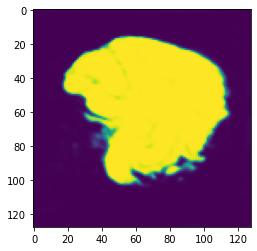

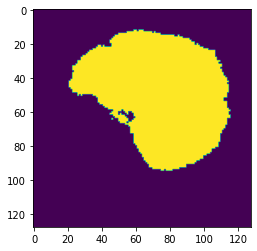

In [ ]:
prediction_dice(model, test_dataloader)
input, label,pred =predict(model,test_dataloader)
plt.imshow(pred[0][0])
plt.show()
plt.imshow(label[0][0])
plt.show()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

num_epochs = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SegNet(in_channels=1, num_classes=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=5)
start_time = time.time()
train_loss_history, train_dice_history, val_loss_history, val_dice_history,e = train_model_early_stopping(train_dataloader, val_dataloader, bce_dice_loss, optimizer, scheduler, num_epochs)
end_time = time.time()

Epoch: 1/50 |  Train Loss: 0.400, Val Loss: 0.325, Train DICE: 0.900, Val DICE: 0.941
Best validation dice coefficient improved to 0.941
Epoch: 2/50 |  Train Loss: 0.089, Val Loss: 0.287, Train DICE: 0.978, Val DICE: 0.947
Best validation dice coefficient improved to 0.947
Epoch: 3/50 |  Train Loss: 0.070, Val Loss: 0.337, Train DICE: 0.982, Val DICE: 0.944
No improvement in validation dice coefficient for 1 consecutive epochs
Epoch: 4/50 |  Train Loss: 0.062, Val Loss: 0.250, Train DICE: 0.984, Val DICE: 0.955
Best validation dice coefficient improved to 0.955
Epoch: 5/50 |  Train Loss: 0.057, Val Loss: 0.272, Train DICE: 0.986, Val DICE: 0.953
No improvement in validation dice coefficient for 1 consecutive epochs
Epoch: 6/50 |  Train Loss: 0.053, Val Loss: 0.277, Train DICE: 0.987, Val DICE: 0.952
No improvement in validation dice coefficient for 2 consecutive epochs
Epoch: 7/50 |  Train Loss: 0.050, Val Loss: 0.247, Train DICE: 0.987, Val DICE: 0.959
Best validation dice coefficient

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/dhl_exam/models/segnet_model_brain.pth')

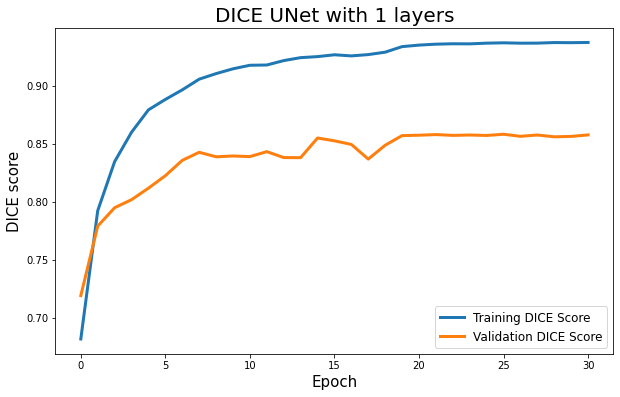

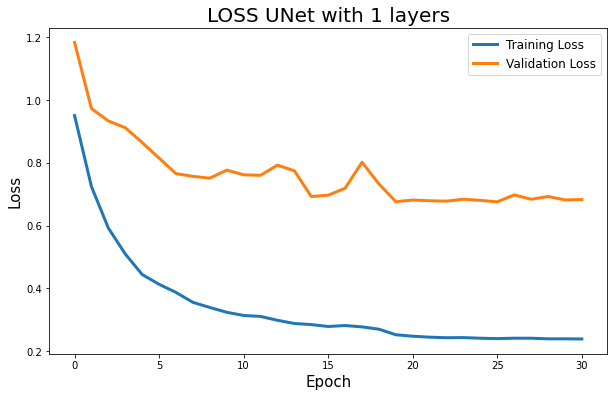

In [ ]:
for k in dict_layer_to_parameters.keys():

  plot_dice_history('DICE UNet with {} layers'.format(1), layer_train_dice_history[k], layer_val_dice_history[k], len(layer_val_dice_history[k]))
  plot_loss_history('LOSS UNet with {} layers'.format(1), layer_train_loss_history[k], layer_val_loss_history[k],len(layer_val_loss_history[k]))

**BENCHMARK**

In [ ]:
class FCN(nn.Module):
    def __init__(self, input_shape=(1, 128, 128), num_classes=2):
        super(FCN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(input_shape[0], 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.middle = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, num_classes, kernel_size=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.middle(x)
        x = self.decoder(x)
        return x



In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FCN(input_shape=(1, 128, 128), num_classes=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=5)
num_epochs = 50

In [ ]:
%%time
train_loss_history, train_dice_history, val_loss_history, val_dice_history = train_model(train_dataloader, val_dataloader, bce_dice_loss, optimizer, scheduler, num_epochs)

Epoch: 1/50 |  Train Loss: 1.069, Val Loss: 1.327, Train DICE: 0.637, Val DICE: 0.707
Epoch: 2/50 |  Train Loss: 1.000, Val Loss: 1.312, Train DICE: 0.700, Val DICE: 0.692
Epoch: 3/50 |  Train Loss: 0.945, Val Loss: 1.244, Train DICE: 0.714, Val DICE: 0.714
Epoch: 4/50 |  Train Loss: 0.870, Val Loss: 1.098, Train DICE: 0.737, Val DICE: 0.745
Epoch: 5/50 |  Train Loss: 0.801, Val Loss: 1.112, Train DICE: 0.757, Val DICE: 0.746
Epoch: 6/50 |  Train Loss: 0.732, Val Loss: 1.000, Train DICE: 0.780, Val DICE: 0.771
Epoch: 7/50 |  Train Loss: 0.660, Val Loss: 0.949, Train DICE: 0.808, Val DICE: 0.784
Epoch: 8/50 |  Train Loss: 0.604, Val Loss: 0.926, Train DICE: 0.827, Val DICE: 0.790
Epoch: 9/50 |  Train Loss: 0.558, Val Loss: 0.905, Train DICE: 0.842, Val DICE: 0.798
Epoch: 10/50 |  Train Loss: 0.526, Val Loss: 0.865, Train DICE: 0.852, Val DICE: 0.809
Epoch: 11/50 |  Train Loss: 0.482, Val Loss: 0.816, Train DICE: 0.865, Val DICE: 0.821
Epoch: 12/50 |  Train Loss: 0.466, Val Loss: 0.838, 

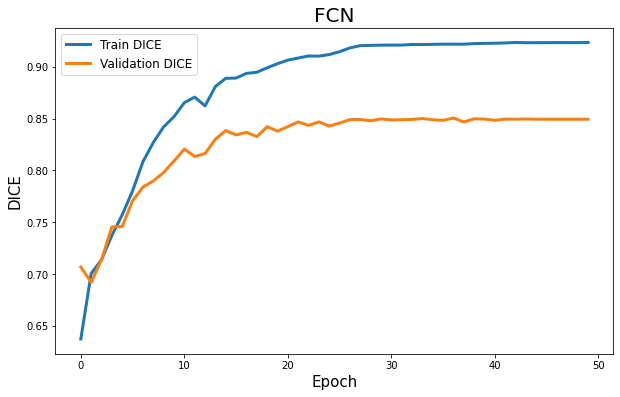

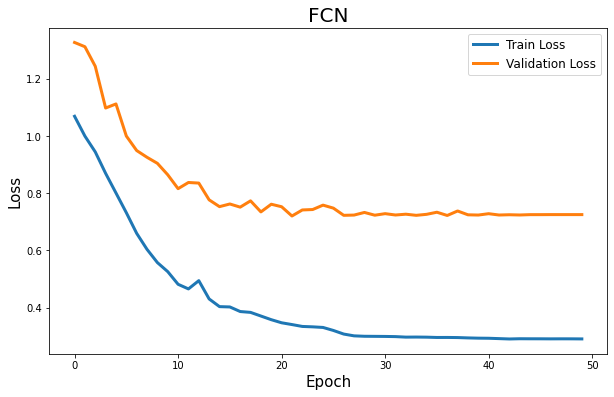

0.8010479018987675

In [ ]:
plot_dice_history('FCN', train_dice_history, val_dice_history, num_epochs)
plot_loss_history('FCN', train_loss_history, val_loss_history, num_epochs)
prediction_dice(model, test_dataloader)

In [ ]:
# training function with early stopping
def train_model_early_stopping(train_loader, val_loader, loss_func, optimizer, scheduler, num_epochs, patience=5):
    train_loss_history = []
    train_dice_history = []
    val_loss_history = []
    val_dice_history = []

    best_val_dice = 0
    consecutive_no_improvement = 0
    
    for epoch in range(num_epochs):
        train_dices, train_losses = train_loop(model, train_loader, loss_func, optimizer)
        train_mean_dice = np.array(train_dices).mean()
        train_mean_loss = np.array(train_losses).mean()
        val_mean_dice, val_mean_loss = eval_loop(model, val_loader, loss_func, scheduler)
        
        train_loss_history.append(train_mean_loss)
        train_dice_history.append(train_mean_dice)
        val_loss_history.append(val_mean_loss.cpu().numpy())
        val_dice_history.append(val_mean_dice)
        
        print('Epoch: {}/{} |  Train Loss: {:.3f}, Val Loss: {:.3f}, Train DICE: {:.3f}, Val DICE: {:.3f}'.format(epoch+1, num_epochs,
                                                                                                                 train_mean_loss,
                                                                                                                 val_mean_loss,
                                                                                                                 train_mean_dice,
                                                                                                                 val_mean_dice))
        
        # Check for improvement in validation dice coefficient
        if val_mean_dice > best_val_dice:
            best_val_dice = val_mean_dice
            consecutive_no_improvement = 0
            print('Best validation dice coefficient improved to {:.3f}'.format(best_val_dice))
        else:
            consecutive_no_improvement += 1
            print('No improvement in validation dice coefficient for {} consecutive epochs'.format(consecutive_no_improvement))
            if consecutive_no_improvement >= patience:
                print('Early stopping triggered after {} epochs'.format(epoch+1))
                break

    return train_loss_history, train_dice_history, val_loss_history, val_dice_history,epoch+1


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FCN(input_shape=(1, 128, 128), num_classes=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=5)
num_epochs = 50

In [ ]:
%%time
train_loss_history, train_dice_history, val_loss_history, val_dice_history = train_model_early_stopping(train_dataloader, val_dataloader, bce_dice_loss, optimizer, scheduler, num_epochs)

Epoch: 1/50 |  Train Loss: 1.060, Val Loss: 1.326, Train DICE: 0.690, Val DICE: 0.697
Best validation dice coefficient improved to 0.697
Epoch: 2/50 |  Train Loss: 0.986, Val Loss: 1.281, Train DICE: 0.705, Val DICE: 0.712
Best validation dice coefficient improved to 0.712
Epoch: 3/50 |  Train Loss: 0.904, Val Loss: 1.180, Train DICE: 0.727, Val DICE: 0.729
Best validation dice coefficient improved to 0.729
Epoch: 4/50 |  Train Loss: 0.821, Val Loss: 1.088, Train DICE: 0.752, Val DICE: 0.750
Best validation dice coefficient improved to 0.750
Epoch: 5/50 |  Train Loss: 0.743, Val Loss: 0.997, Train DICE: 0.777, Val DICE: 0.768
Best validation dice coefficient improved to 0.768
Epoch: 6/50 |  Train Loss: 0.687, Val Loss: 0.944, Train DICE: 0.798, Val DICE: 0.785
Best validation dice coefficient improved to 0.785
Epoch: 7/50 |  Train Loss: 0.618, Val Loss: 0.948, Train DICE: 0.823, Val DICE: 0.789
Best validation dice coefficient improved to 0.789
Epoch: 8/50 |  Train Loss: 0.569, Val Los

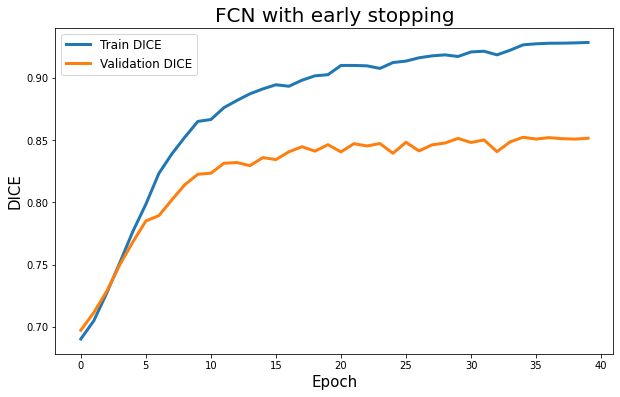

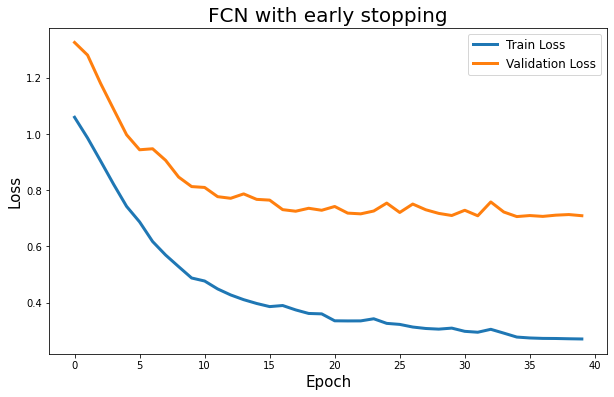

0.8018931013852304

In [ ]:
plot_dice_history('FCN with early stopping', train_dice_history, val_dice_history, 40)
plot_loss_history('FCN with early stopping', train_loss_history, val_loss_history, 40)
prediction_dice(model, test_dataloader)

In [ ]:
class FCN_flexible(nn.Module):
    def __init__(self, input_shape=(1, 128, 128), num_classes=2, dropout_prob=0.5, num_layers=2):
        super(FCN_flexible, self).__init__()

        # Create encoder layers
        encoder_layers = []
        in_channels = input_shape[0]
        for i in range(num_layers):
            out_channels = 64 * (2 ** i)
            encoder_layers.extend([
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_prob),
                nn.MaxPool2d(kernel_size=2, stride=2)
            ])
            in_channels = out_channels

        self.encoder = nn.Sequential(*encoder_layers)

        # Create middle layer
        self.middle = nn.Sequential(
            nn.Conv2d(in_channels, in_channels * 2, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_prob),
            nn.Conv2d(in_channels * 2, in_channels, kernel_size=1)
        )

        # Create decoder layers
        decoder_layers = []
        for i in range(num_layers - 1, -1, -1):
            out_channels = 64 * (2 ** i)
            decoder_layers.extend([
                nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_prob)
            ])
            in_channels = out_channels

        decoder_layers.extend([
            nn.Conv2d(out_channels, num_classes, kernel_size=1),
            nn.Sigmoid()
        ])

        self.decoder = nn.Sequential(*decoder_layers)

    def forward(self, x):
        x = self.encoder(x)
        x = self.middle(x)
        x = self.decoder(x)
        return x



In [ ]:
%%time
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs = 50
model = FCN_flexible(input_shape=(1, 128, 128), num_classes=2, dropout_prob=0.5, num_layers=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=5)
train_loss_history, train_dice_history, val_loss_history, val_dice_history = train_model_early_stopping(train_dataloader, val_dataloader, bce_dice_loss, optimizer, scheduler, num_epochs)


Epoch: 1/50 |  Train Loss: 1.073, Val Loss: 1.452, Train DICE: 0.675, Val DICE: 0.712
Best validation dice coefficient improved to 0.712
Epoch: 2/50 |  Train Loss: 1.014, Val Loss: 1.439, Train DICE: 0.690, Val DICE: 0.711
No improvement in validation dice coefficient for 1 consecutive epochs
Epoch: 3/50 |  Train Loss: 0.971, Val Loss: 1.348, Train DICE: 0.704, Val DICE: 0.732
Best validation dice coefficient improved to 0.732
Epoch: 4/50 |  Train Loss: 0.875, Val Loss: 1.210, Train DICE: 0.737, Val DICE: 0.752
Best validation dice coefficient improved to 0.752
Epoch: 5/50 |  Train Loss: 0.776, Val Loss: 1.094, Train DICE: 0.770, Val DICE: 0.784
Best validation dice coefficient improved to 0.784
Epoch: 6/50 |  Train Loss: 0.697, Val Loss: 0.994, Train DICE: 0.799, Val DICE: 0.800
Best validation dice coefficient improved to 0.800
Epoch: 7/50 |  Train Loss: 0.624, Val Loss: 0.905, Train DICE: 0.825, Val DICE: 0.812
Best validation dice coefficient improved to 0.812
Epoch: 8/50 |  Train 

In [ ]:
dict_layer_to_parameters={}
layer_train_loss_history={}
layer_train_dice_history={}
layer_val_loss_history={}
layer_val_dice_history={}
dict_pred_dice={}
dict_stopping_epoch={}
dict_time_taken={}
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_epochs = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
layers=[1,2,3,4,5,6,7]

for layer in layers:
  start_time = time.time()
  print("Number of layers: ", layer)
  print("Number of parameters: ", count_parameters(model))
  dict_layer_to_parameters[layer]=count_parameters(model)
  model = FCN_flexible(input_shape=(1, 128, 128), num_classes=2, dropout_prob=0.5, num_layers=layer).to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=3)
  train_loss_history, train_dice_history, val_loss_history, val_dice_history,se = train_model_early_stopping(train_dataloader, val_dataloader, bce_dice_loss, optimizer, scheduler, num_epochs)
  end_time = time.time()
  layer_train_loss_history[layer]=train_loss_history
  layer_train_dice_history[layer]=train_dice_history
  layer_val_loss_history[layer]=val_loss_history
  layer_val_dice_history[layer]=val_dice_history
  dict_pred_dice[layer]=prediction_dice(model, test_dataloader)
  dict_stopping_epoch[layer]=se
  dict_time_taken[layer]=end_time - start_time


Number of layers:  1
Number of parameters:  501186
Epoch: 1/100 |  Train Loss: 1.078, Val Loss: 1.362, Train DICE: 0.684, Val DICE: 0.695
Best validation dice coefficient improved to 0.695
Epoch: 2/100 |  Train Loss: 1.024, Val Loss: 1.355, Train DICE: 0.692, Val DICE: 0.695
Best validation dice coefficient improved to 0.695
Epoch: 3/100 |  Train Loss: 1.007, Val Loss: 1.336, Train DICE: 0.693, Val DICE: 0.699
Best validation dice coefficient improved to 0.699
Epoch: 4/100 |  Train Loss: 0.987, Val Loss: 1.282, Train DICE: 0.699, Val DICE: 0.705
Best validation dice coefficient improved to 0.705
Epoch: 5/100 |  Train Loss: 0.966, Val Loss: 1.261, Train DICE: 0.705, Val DICE: 0.712
Best validation dice coefficient improved to 0.712
Epoch: 6/100 |  Train Loss: 0.944, Val Loss: 1.259, Train DICE: 0.713, Val DICE: 0.723
Best validation dice coefficient improved to 0.723
Epoch: 7/100 |  Train Loss: 0.923, Val Loss: 1.227, Train DICE: 0.721, Val DICE: 0.735
Best validation dice coefficient i

In [ ]:
print(dict_layer_to_parameters)
print(dict_pred_dice)
print(dict_stopping_epoch)
print(dict_time_taken)

{1: 17266306, 2: 99330, 3: 501186, 4: 2107714, 5: 8532034, 6: 34225730, 7: 136993346, 8: 548049474}
{1: 0.7300919337873308, 2: 0.796898745033397, 3: 0.8270401579395199, 4: 0.8776617456700335, 5: 0.85302514185705, 6: 0.659458133664202, 7: 0.9009089125280385}
{1: 44, 2: 22, 3: 20, 4: 23, 5: 27, 6: 6, 7: 20}
{1: 50.860872983932495, 2: 30.19510006904602, 3: 31.443172931671143, 4: 42.64448118209839, 5: 70.64055013656616, 6: 36.10419678688049, 7: 313.473908662796}


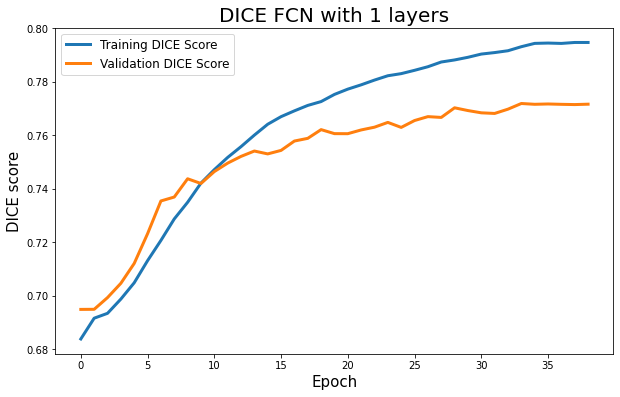

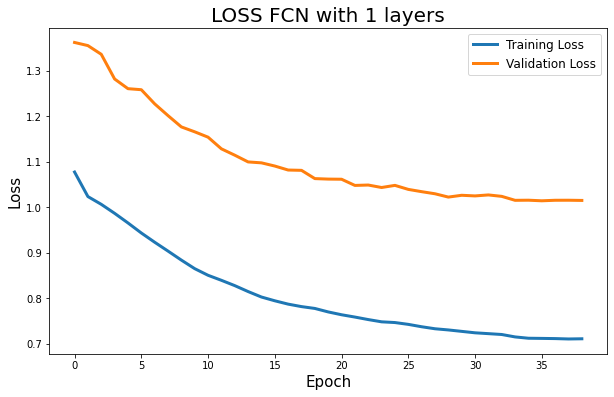

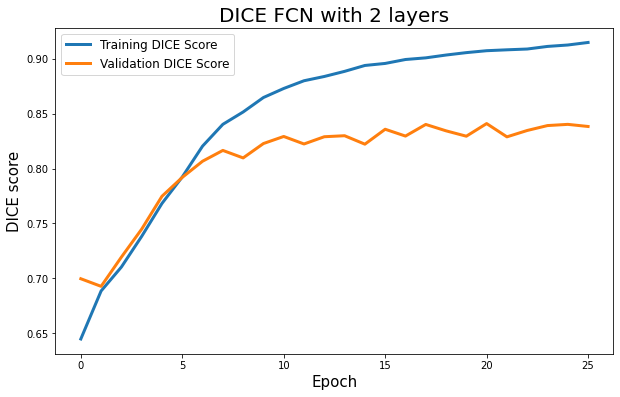

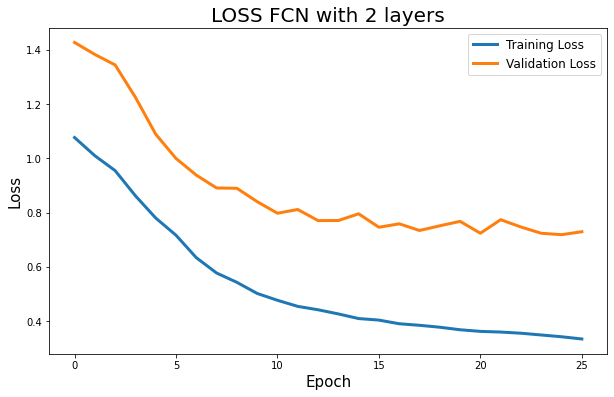

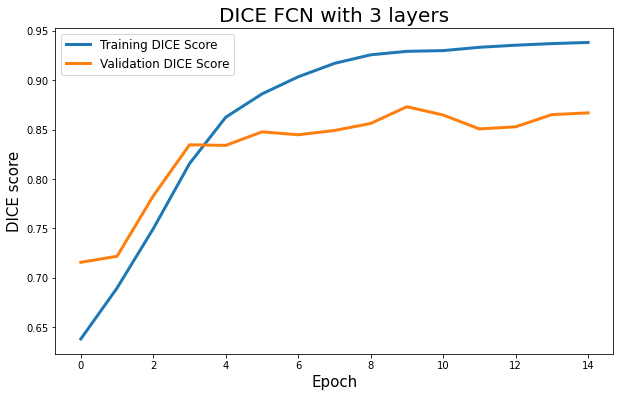

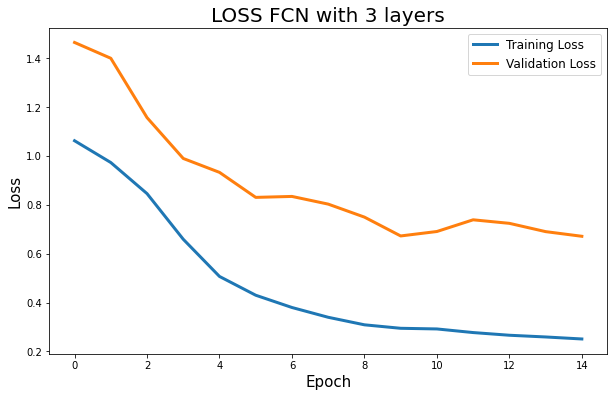

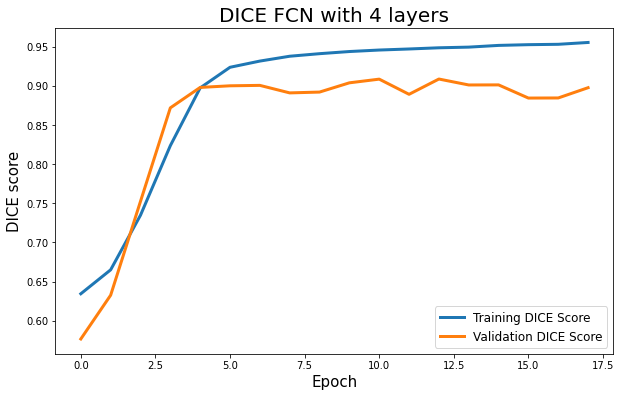

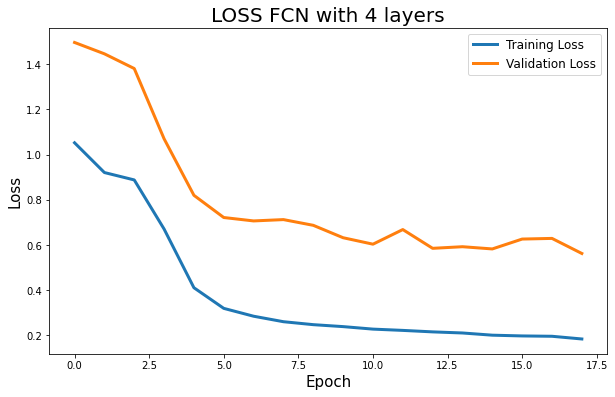

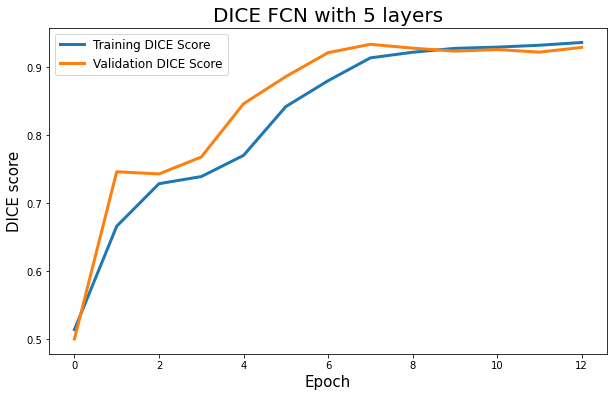

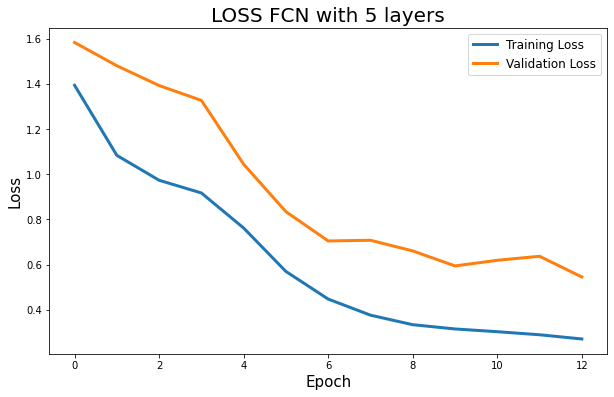

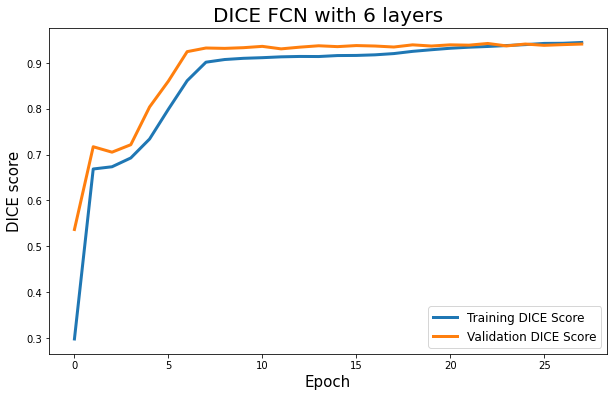

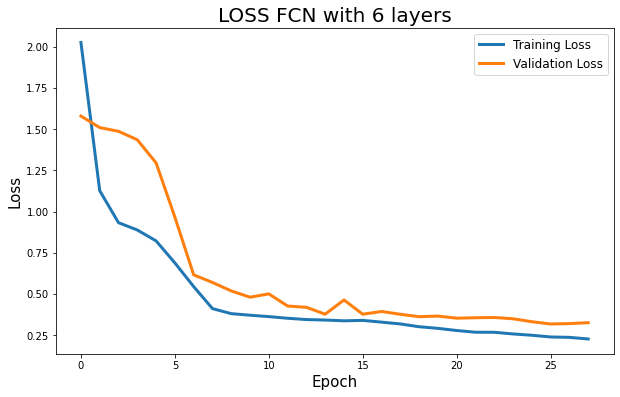

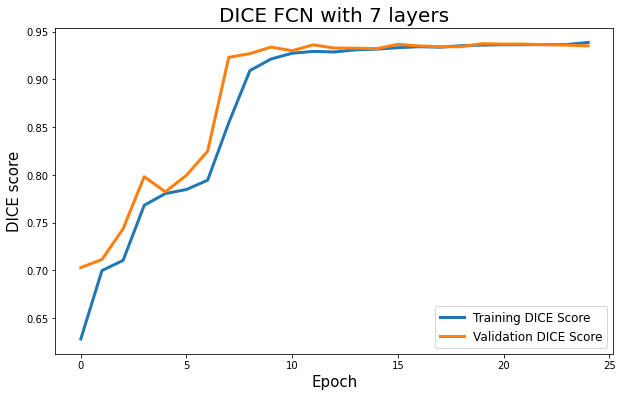

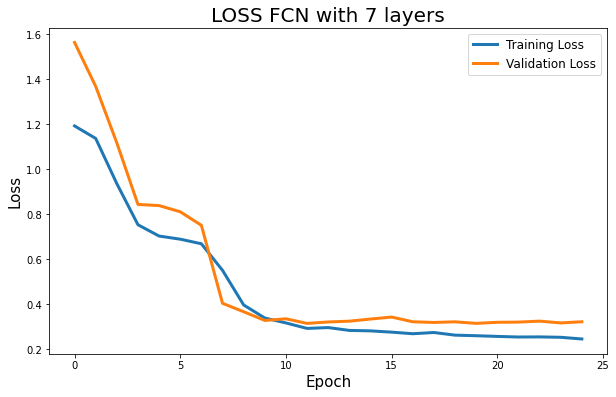

In [ ]:
for k in dict_layer_to_parameters.keys():

  plot_dice_history('DICE FCN with {} layers'.format(k), layer_train_dice_history[k], layer_val_dice_history[k], len(layer_val_dice_history[k]))
  plot_loss_history('LOSS FCN with {} layers'.format(k), layer_train_loss_history[k], layer_val_loss_history[k],len(layer_val_loss_history[k]))

**DROPOUT**

In [ ]:
d_train_loss_history={}
d_train_dice_history={}
d_val_loss_history={}
d_val_dice_history={}
dict_pred_dice={}
dict_stopping_epoch={}
dict_time_taken={}
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_epochs = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dropout_values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for d in dropout_values:
  start_time = time.time()
  print("Dropout value: ", d)
  print("Number of parameters: ", count_parameters(model))
  model = FCN_flexible(input_shape=(1, 128, 128), num_classes=2, dropout_prob=d, num_layers=4).to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=3)
  train_loss_history, train_dice_history, val_loss_history, val_dice_history,se = train_model_early_stopping(train_dataloader, val_dataloader, bce_dice_loss, optimizer, scheduler, num_epochs)
  end_time = time.time()
  d_train_loss_history[d]=train_loss_history
  d_train_dice_history[d]=train_dice_history
  d_val_loss_history[d]=val_loss_history
  d_val_dice_history[d]=val_dice_history
  dict_pred_dice[d]=prediction_dice(model, test_dataloader)
  dict_stopping_epoch[d]=se
  dict_time_taken[d]=end_time - start_time


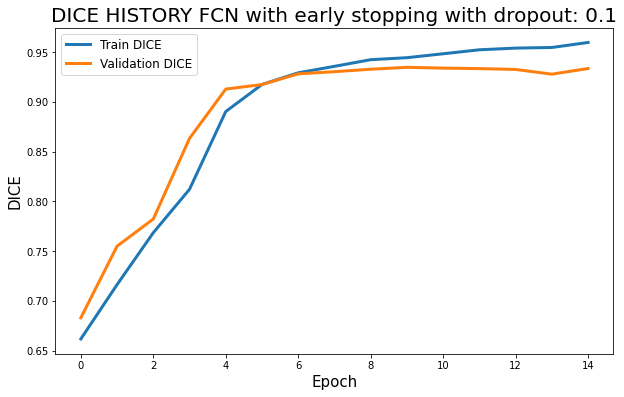

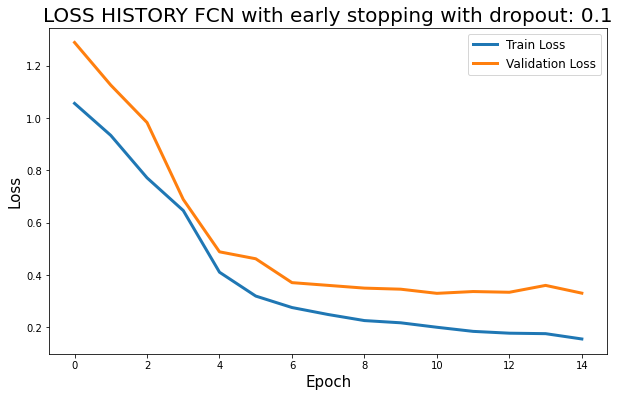

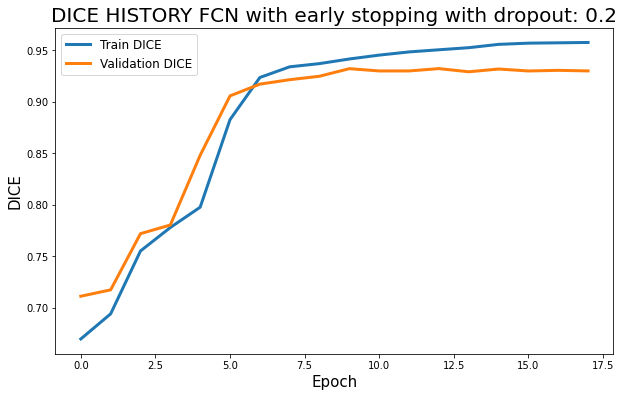

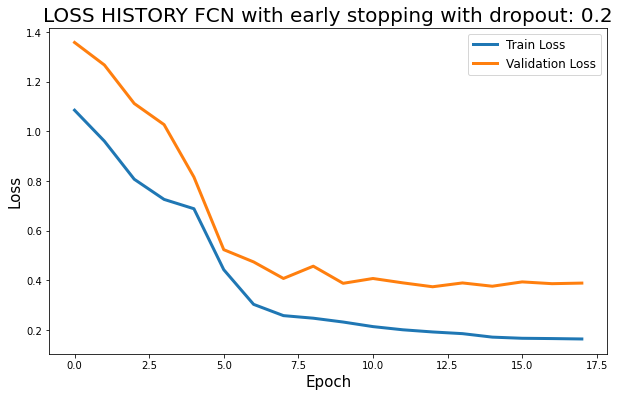

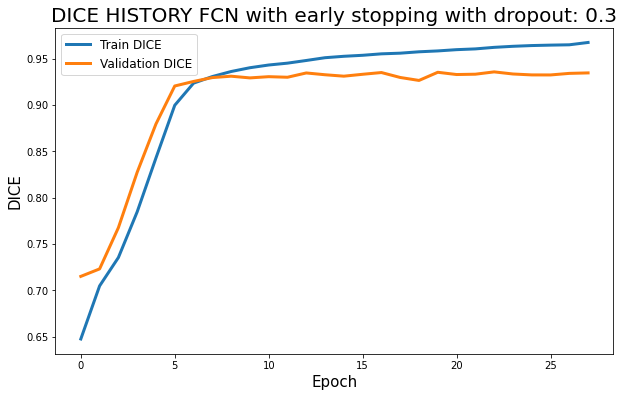

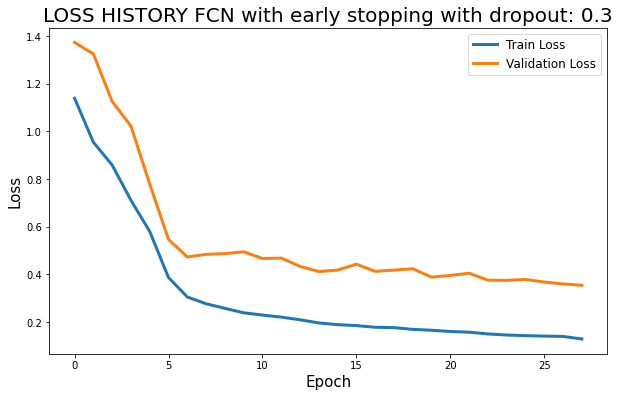

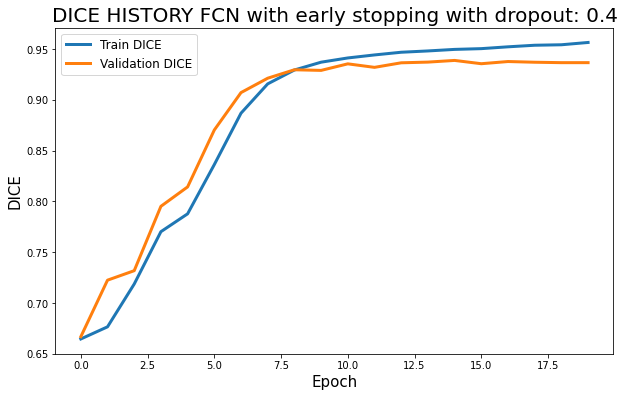

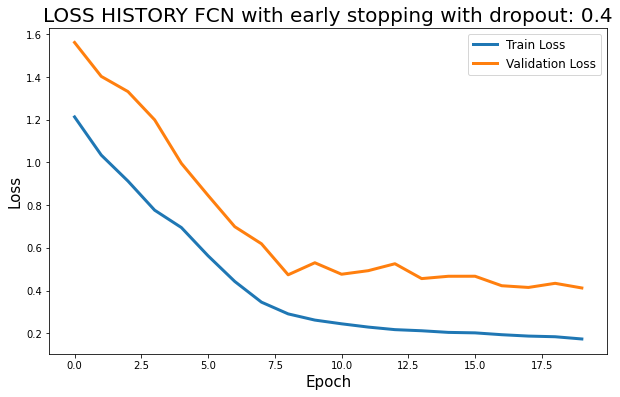

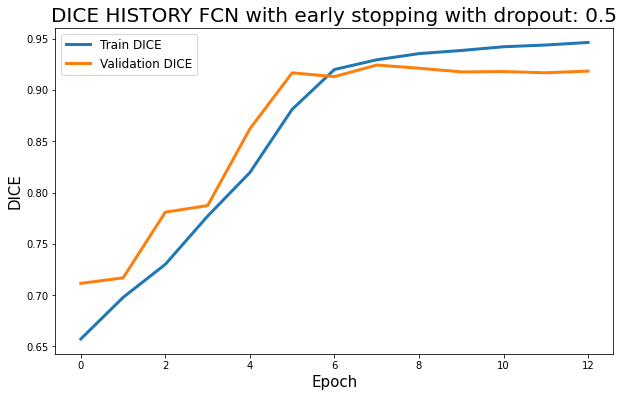

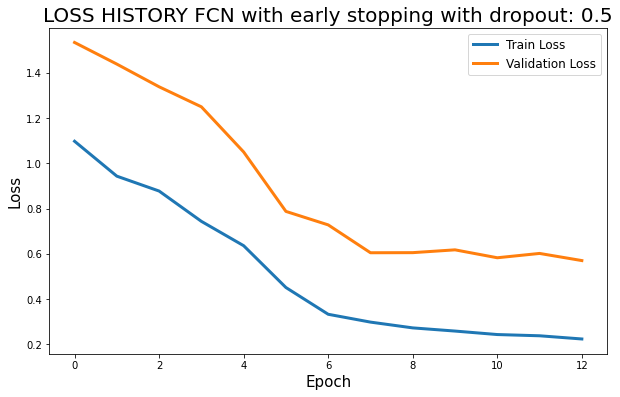

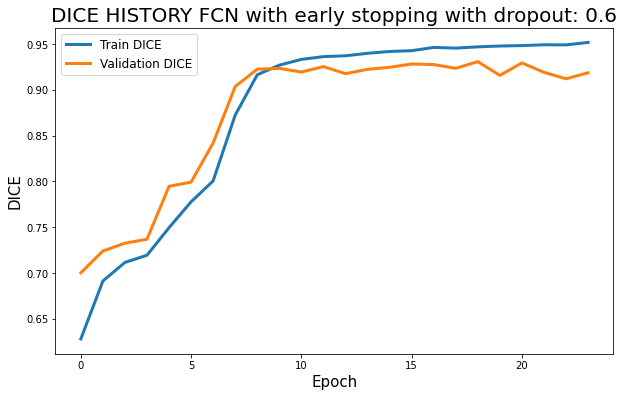

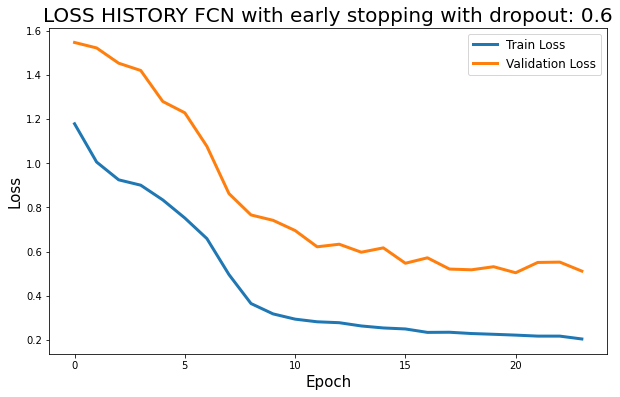

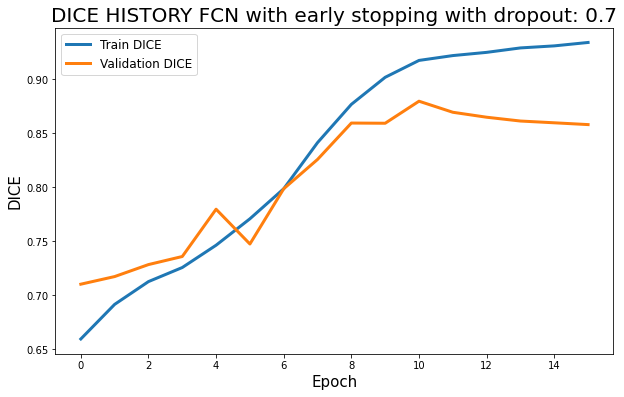

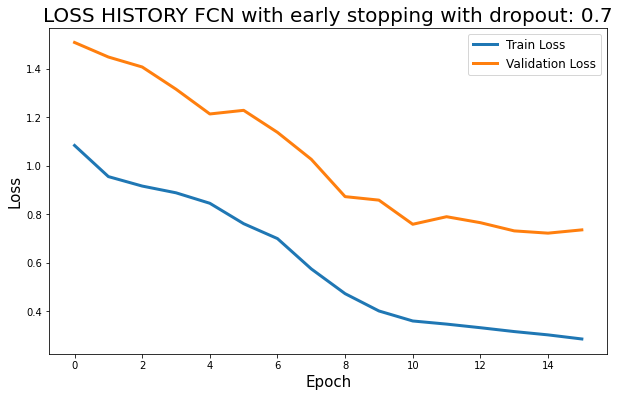

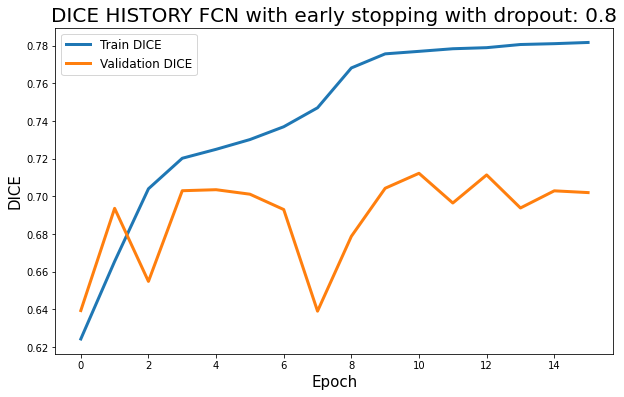

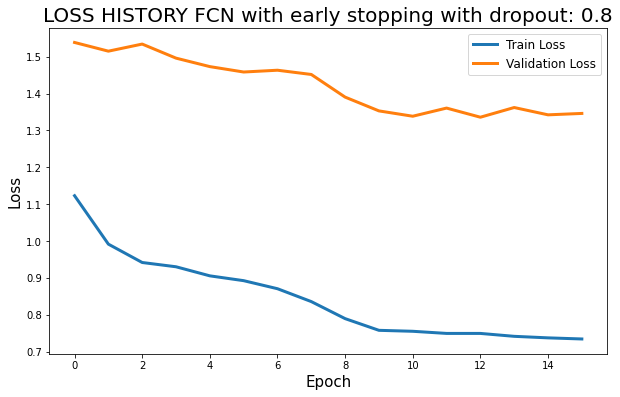

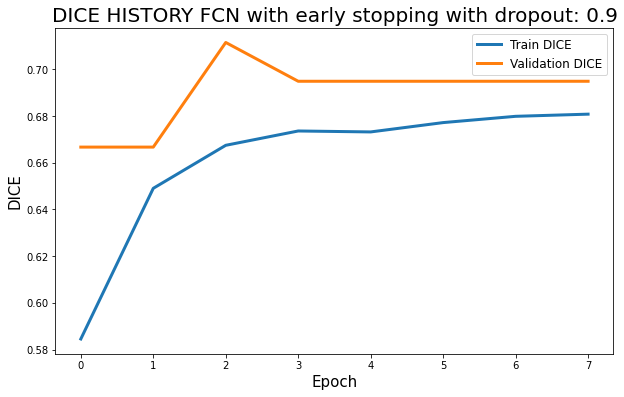

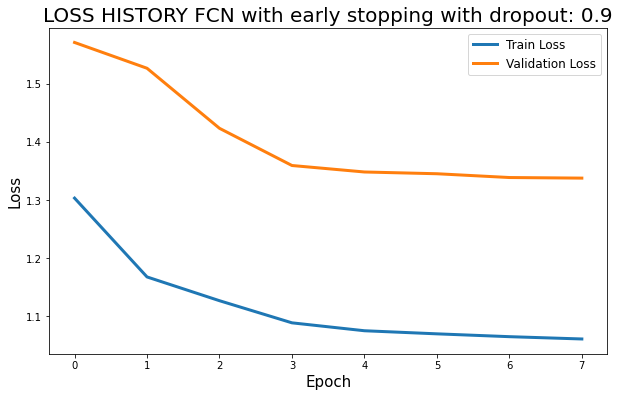

In [ ]:
for k in d_train_dice_history.keys():

  plot_dice_history('DICE HISTORY FCN with early stopping with dropout: '+str(k), d_train_dice_history[k], d_val_dice_history[k], len(d_val_dice_history[k]))
  plot_loss_history('LOSS HISTORY FCN with early stopping with dropout: '+str(k), d_train_loss_history[k], d_val_loss_history[k],len(d_val_loss_history[k]))

In [ ]:

print(dict_pred_dice)
print(dict_stopping_epoch)
print(dict_time_taken)

In [ ]:
d_train_loss_history={}
d_train_dice_history={}
d_val_loss_history={}
d_val_dice_history={}
dict_pred_dice={}
dict_stopping_epoch={}
dict_time_taken={}
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_epochs = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dropout_values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for d in dropout_values:
  start_time = time.time()
  print("Dropout value: ", d)
  print("Number of parameters: ", count_parameters(model))
  model = FCN_flexible(input_shape=(1, 128, 128), num_classes=2, dropout_prob=d, num_layers=2).to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=3)
  train_loss_history, train_dice_history, val_loss_history, val_dice_history,se = train_model_early_stopping(train_dataloader, val_dataloader, bce_dice_loss, optimizer, scheduler, num_epochs)
  end_time = time.time()
  d_train_loss_history[d]=train_loss_history
  d_train_dice_history[d]=train_dice_history
  d_val_loss_history[d]=val_loss_history
  d_val_dice_history[d]=val_dice_history
  dict_pred_dice[d]=prediction_dice(model, test_dataloader)
  dict_stopping_epoch[d]=se
  dict_time_taken[d]=end_time - start_time